1. check data 
2. check fiducial features

In [1]:
# segmentation 👌done
# ui tkinter test saved in a separated file ,not preprcessed before
# fiducial features 👌done 

In [2]:
# reveiw project and test again  👌done
# save some array in text files to read later for testing ok 👌done
# then tkinter

In [3]:
import os
import numpy as np
import pandas as pd
import scipy.io
import scipy

from statsmodels.graphics import tsaplots
import statsmodels.api as sm

import matplotlib.pyplot as plt
# from scipy import signal
from scipy.signal import butter,filtfilt
import warnings
warnings.filterwarnings('ignore')
import glob
import wfdb as wf


In [4]:
s2=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\chosen\p_156\s0299lre'
s3=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\chosen\p_165\s0322lre'
s5=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\p_174\s0300lre'
s7=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\p_184\s0363lre'
s8=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\p_185\s0336lre'
s9=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\p_198\s0402lre'
s10=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\sub_150\s0287lre'
s13=r'F:\mohamed\4th_year_new\Semester 2\HCI\Project\ptb diagnostic healthy subs\sub260\s0496_re'

In [5]:
import numpy as np
import scipy.signal as signal

def ecg_isoline_drift_correction(ecg_signal, sampling_rate):
    # Apply a high-pass filter to remove baseline wander and DC drift
    b, a = signal.butter(2, 0.5 / (sampling_rate / 2), 'highpass')
    ecg_filtered = signal.filtfilt(b, a, ecg_signal)

    # Estimate the isoelectric line (baseline) using a moving average filter
    window_size = int(sampling_rate * 0.2)  # 200 ms window size
    baseline = signal.savgol_filter(ecg_filtered, window_size, 1)

    # Subtract the estimated baseline from the filtered ECG signal
    ecg_corrected = ecg_filtered - baseline

    return ecg_corrected

In [6]:
def butter_bandbass_filter(Input_signal,low_cutoff,high_cutoff,sampling_rate,order=4):
    nyq=0.5*sampling_rate #nyquist sampling
    low=low_cutoff/nyq
    high=high_cutoff/nyq
    
    numerator,denominator=butter(order,[low,high],btype='band',output='ba',analog=False,fs=None)
    filtered=filtfilt(numerator,denominator,Input_signal)
    
    return filtered

In [7]:
from scipy.signal import find_peaks
def ecg_segmentation(ecg_signal, fs=1000, threshold=0.5):
    # Find R-peaks using a threshold-based approach
    peaks, _ = find_peaks(ecg_signal, height=threshold)

    
    # Calculate the RR intervals
    rr_intervals = np.diff(peaks) / fs

#     # Plot the ECG signal and detected R-peaks
#     time = np.arange(len(ecg_signal)) / fs
#     plt.figure(figsize=(12, 6))
#     plt.plot(time, ecg_signal, 'b', label='ECG Signal')
#     plt.plot(time[peaks], ecg_signal[peaks], 'ro', label='R-Peaks')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Amplitude')
#     plt.title('ECG Signal Segmentation')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

    return peaks, rr_intervals

In [8]:
def extract_ecg_segments(ecg_signal, r_peaks, fs=1000, window_size=0.2):
    # Calculate the window size in samples
    window_size_samples = int(window_size * fs)

    # Initialize an empty array to store the segments
    segments = []

    # Loop over the R-peaks and extract the corresponding segments
    for r_peak in r_peaks:
        start = r_peak - window_size_samples // 2
        end = r_peak + window_size_samples // 2
        segment = ecg_signal[start:end]
        segments.append(segment)
#     return np.array(segments)       
#######################
    lens=[len(s) for s in segments]
    max_len=max(lens)

    new_segements=[]
    for s in segments:
        if len(s)==max_len:
            new_segements.append(s)
        else:
            zeros_size=max_len-len(s)
            s=np.append(s,np.zeros(zeros_size))
            new_segements.append(s)
############################    
    
    
    return np.array(new_segements)

In [9]:
def preprocess_using_ACDCT(filtered_signal):
    sig=np.array(filtered_signal)
    AC=sm.tsa.acf(sig,nlags=1000)
    s=AC[0:100]
    DCT=scipy.fftpack.dct(s,type=2)
    
    return DCT

In [10]:
signal_array, fields=wf.rdsamp(s9)
sig = signal_array[:,1]

In [11]:
filtered_signal=butter_bandbass_filter(sig,1,40,sampling_rate=1000,order=4)

In [12]:
ecg_corrected = ecg_isoline_drift_correction(sig, sampling_rate=1000)
r_peaks, rr_intervals = ecg_segmentation(ecg_corrected, fs=1000, threshold=0.7)
segments = extract_ecg_segments(ecg_corrected, r_peaks, fs=1000, window_size=0.7)

Text(0.5, 1.0, 'ecg_corrected signal')

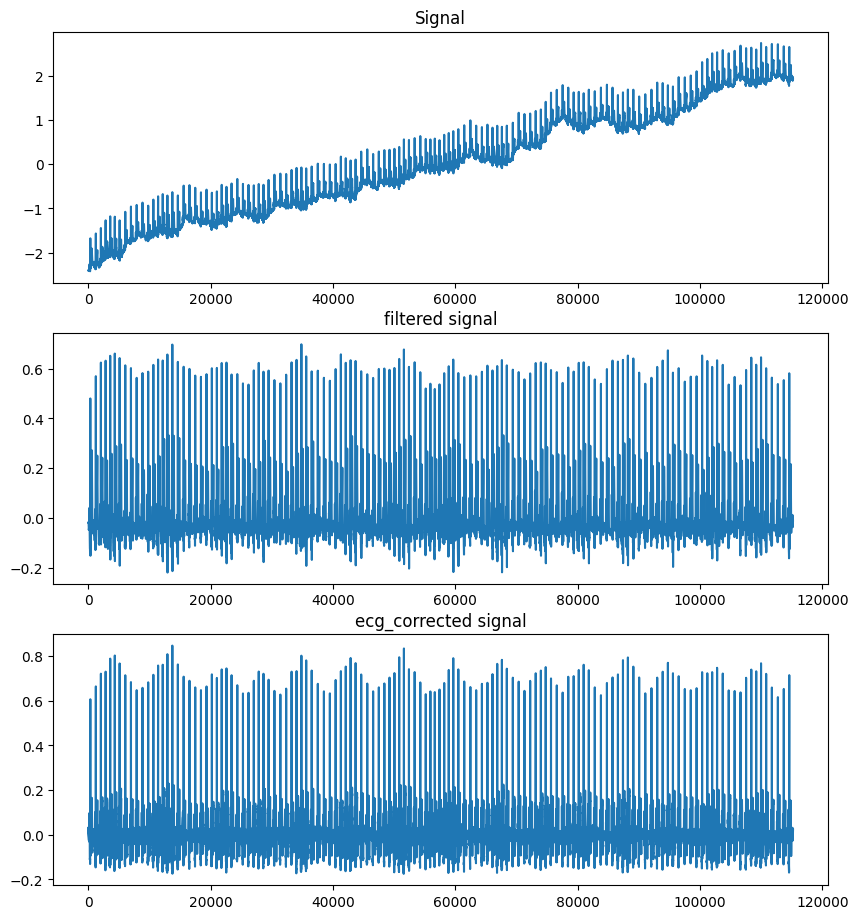

In [13]:
plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.plot(sig)
plt.title('Signal')

plt.subplot(4,1,2)
plt.plot(filtered_signal)
plt.title('filtered signal')

plt.subplot(4,1,3)
plt.plot(ecg_corrected)
plt.title('ecg_corrected signal')

Text(0.5, 1.0, 'one Segment')

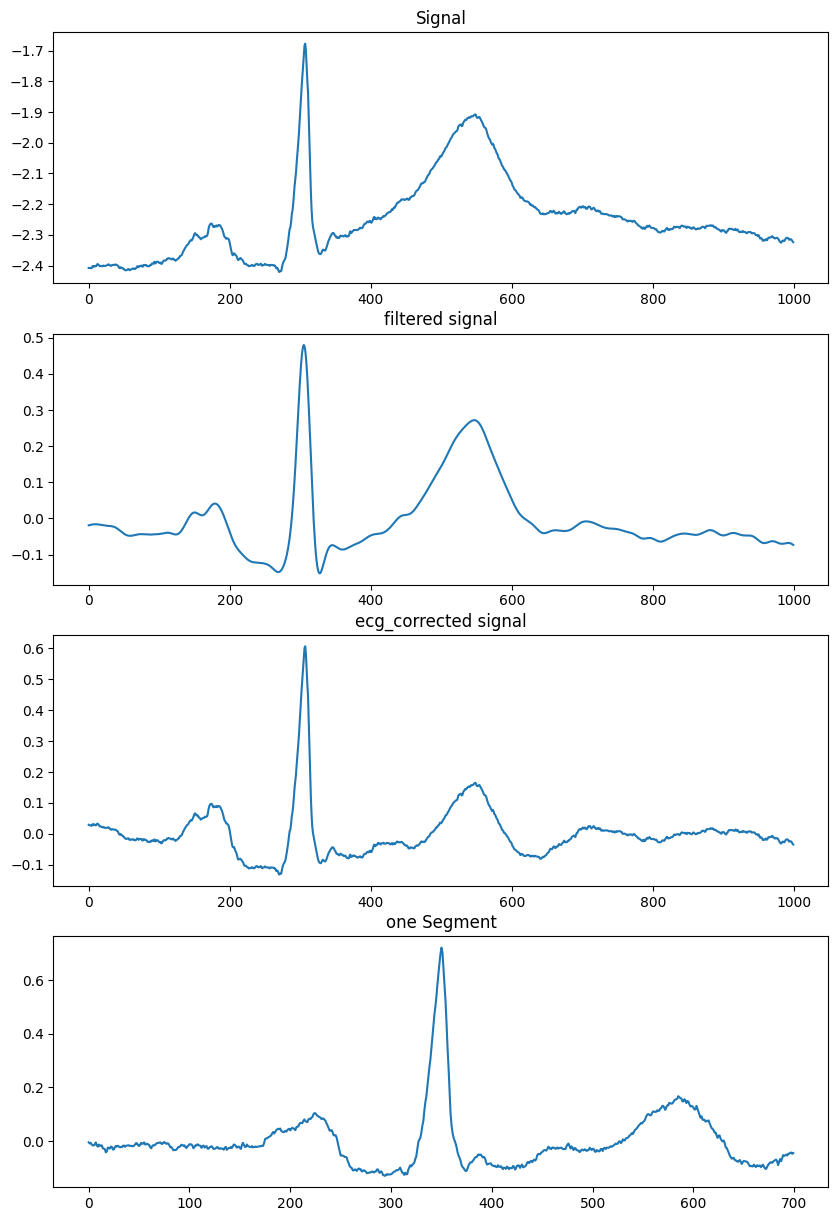

In [14]:
plt.figure(figsize=(10,15))
plt.subplot(4,1,1)
plt.plot(sig[0:1000])
plt.title('Signal')

plt.subplot(4,1,2)
plt.plot(filtered_signal[0:1000])
plt.title('filtered signal')

plt.subplot(4,1,3)
plt.plot(ecg_corrected[0:1000])
plt.title('ecg_corrected signal')

plt.subplot(4,1,4)
plt.plot(segments[0])
plt.title('one Segment')

# primary for the whole signal 

# start project code

In [15]:
files=[s2,s5,s13,s9,]#s8
# [s2,s3,s5,s7,s9,s10,s8,s13]#are the best after long analysis
files

['F:\\mohamed\\4th_year_new\\Semester 2\\HCI\\Project\\ptb diagnostic healthy subs\\chosen\\p_156\\s0299lre',
 'F:\\mohamed\\4th_year_new\\Semester 2\\HCI\\Project\\ptb diagnostic healthy subs\\p_174\\s0300lre',
 'F:\\mohamed\\4th_year_new\\Semester 2\\HCI\\Project\\ptb diagnostic healthy subs\\sub260\\s0496_re',
 'F:\\mohamed\\4th_year_new\\Semester 2\\HCI\\Project\\ptb diagnostic healthy subs\\p_198\\s0402lre']

In [16]:
data={}
for idx,sub in enumerate(files):
    signal_array, fields=wf.rdsamp(sub)
    sig = signal_array[:,1]
    sname=f"sub_{idx+1}"
    data[sname]=sig

In [17]:
data

{'sub_1': array([ 0.2265,  0.218 ,  0.215 , ..., -0.4795, -0.4835, -0.485 ]),
 'sub_2': array([ 0.0235,  0.0245,  0.027 , ..., -0.2265, -0.228 , -0.233 ]),
 'sub_3': array([-0.3835, -0.386 , -0.3865, ...,  0.346 ,  0.3475,  0.343 ]),
 'sub_4': array([-2.408 , -2.408 , -2.4085, ...,  1.904 ,  1.9085,  1.9155])}

In [18]:
segments_dict={}
for key ,sig in data.items():
    print(key,sig)
    #wander noise removal
    ecg_corrected = ecg_isoline_drift_correction(sig, sampling_rate=1000)
#     segmntation
    r_peaks, rr_intervals = ecg_segmentation(ecg_corrected, fs=1000, threshold=0.7)
    segments = extract_ecg_segments(ecg_corrected, r_peaks, fs=1000, window_size=0.7)
    
    segments_dict[key]=segments[2:52]

sub_1 [ 0.2265  0.218   0.215  ... -0.4795 -0.4835 -0.485 ]
sub_2 [ 0.0235  0.0245  0.027  ... -0.2265 -0.228  -0.233 ]
sub_3 [-0.3835 -0.386  -0.3865 ...  0.346   0.3475  0.343 ]
sub_4 [-2.408  -2.408  -2.4085 ...  1.904   1.9085  1.9155]


In [19]:
segments_dict['sub_1'].shape

(50, 700)

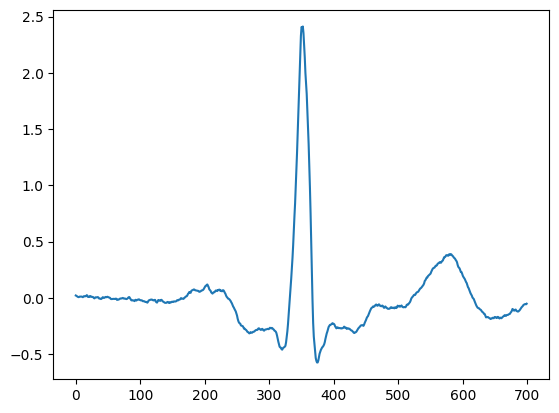

In [20]:
plt.plot(segments_dict['sub_1'][49])

In [21]:
labels=[]
final_data=[]
for key ,signal in segments_dict.items():
    for s in signal:
        labels.append(key)
        final_data.append(s)

In [22]:
final_data=np.vstack(final_data)

labels=np.array(labels)

In [23]:
# fs = 1000
# cutoff_low = 2
# cutoff_high = 40
# nyquist = fs / 2
# level = int(np.floor(np.log2(nyquist/cutoff_low)))
# level

In [24]:
def preprocess_using_ACDCT(filtered_signal):
    sig=np.array(filtered_signal)
    AC=sm.tsa.acf(sig,nlags=1000)
    s=AC[0:100]
    DCT=scipy.fftpack.dct(s,type=2)
    
    return DCT

In [25]:
from fiducial_features import pan_tompkins
def preprocess_using_fiducial(filtered_signal):
    
    features=pan_tompkins(filtered_signal)
    return features

In [26]:
def preprocess_using_wavelet(filtered_signal):  
    import pywt
    from pywt import wavedec ,waverec

    wavelet = 'db4'
    level = 4
    coeffs = pywt.wavedec(filtered_signal, wavelet, level=level)
    
    for i in range(1, level):
        coeffs[i] = np.zeros_like(coeffs[i])

    res = pywt.waverec(coeffs, 'db4')
    return res

In [27]:
def preprocessing(signal,type_):
    
    """
    # type_=1:use wavelet
    # type_=2:use fiducial_features
    # type_=3:use AC/DCT
    
    """
#     butterworth filter 2-40  or 2 -50 
#     sr=1000
    filtered_signal=butter_bandbass_filter(signal,low_cutoff=2,high_cutoff=40,sampling_rate=1000,order=4)
    
#     Features extraction using AC/DCT 
    
    if type_==1:
        features=preprocess_using_wavelet(filtered_signal)
    elif type_==2:
        features=preprocess_using_fiducial(filtered_signal)
    elif type_==3:
        features=preprocess_using_ACDCT(filtered_signal)
    
    return features

In [28]:
def get_sub(idx):
    return f'subject_{idx+1}'

# split data into train and test

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(final_data,labels, test_size=0.20,stratify=labels,shuffle=True,random_state=42)

lb=LabelEncoder()

y_train=lb.fit_transform(y_train)
y_test=lb.transform(y_test)

# Preparing testing files

In [30]:
def preparing_test_files(X_test):
    for i in range(4):
        np.savetxt(f'sub_{i+1}.txt',X_test[y_test==i][0])
    print('done')

In [31]:
preparing_test_files(X_test)

done


In [32]:
y_train[:10]

array([1, 3, 3, 1, 3, 0, 2, 2, 2, 0], dtype=int64)

Text(0.5, 1.0, 'subject_2')

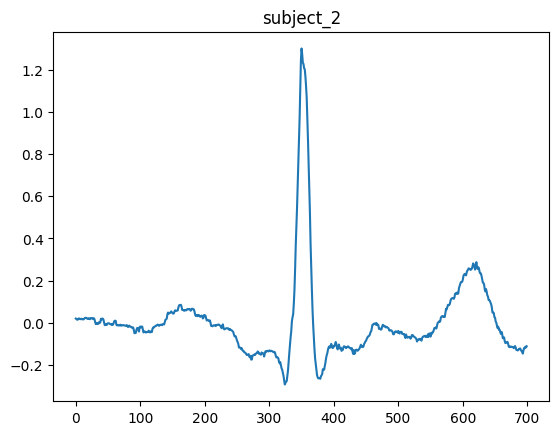

In [33]:
plt.plot(X_train[0])
plt.title(f'{get_sub(y_train[0])}')

# apply preprocessing on both train and test but separately

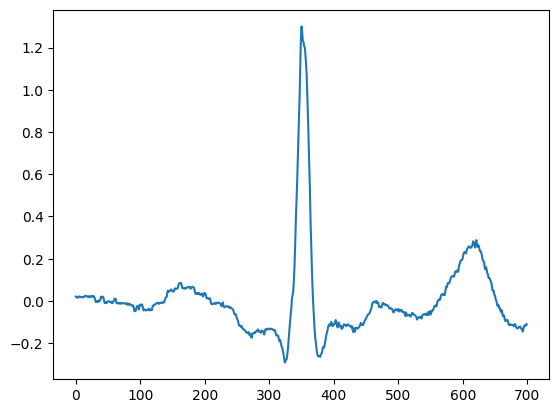

In [34]:
plt.plot(X_train[0])

In [35]:
# type_=1:use wavelet
# type_=2:use fiducial_features
# type_=3:use AC/DCT

type_=3
X_train=[preprocessing(d,type_) for d in X_train]
X_test=[preprocessing(d,type_) for d in X_test]

In [36]:
y_train[:10]

array([1, 3, 3, 1, 3, 0, 2, 2, 2, 0], dtype=int64)

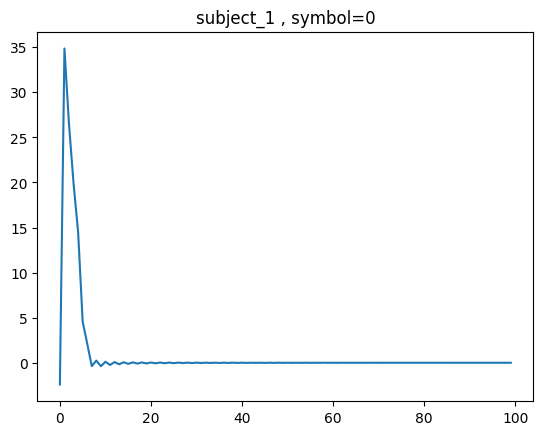

In [37]:
idx=100
if type_==2:
    plt.plot(X_train[idx][0])
    plt.title(f'{get_sub(y_train[idx])} , symbol={y_train[idx]}')
else:
    plt.plot(X_train[idx])
    plt.title(f'{get_sub(y_train[idx])} , symbol={y_train[idx]}')

In [38]:
X_train=np.vstack(X_train)
X_train.shape

(160, 100)

In [39]:
X_test=np.vstack(X_test)
X_test.shape

(40, 100)

In [40]:
y_train.shape

(160,)

In [41]:
# preprocessing
# filter data
# 10-40 butterworth
# extract features
# AC/DCT or wavelet
# normalization or PCA
# then train 

In [42]:
# segentation
# ui tkinter test saved in a separated file ,not preprcessed before
# fiducial features

# SVM

In [43]:
from sklearn import svm
from sklearn.metrics import accuracy_score ,classification_report,ConfusionMatrixDisplay,confusion_matrix

In [44]:
svm_classifier = svm.SVC(kernel='linear') # Linear Kernel

svm_classifier.fit(X=X_train,y=y_train)

pred=svm_classifier.predict(X_test)

print("Accuracy = {} % ".format(accuracy_score(y_test,pred)*100))

Accuracy = 100.0 % 


In [45]:
print(classification_report(y_test,pred,target_names=pd.unique(labels)))

              precision    recall  f1-score   support

       sub_1       1.00      1.00      1.00        10
       sub_2       1.00      1.00      1.00        10
       sub_3       1.00      1.00      1.00        10
       sub_4       1.00      1.00      1.00        10

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



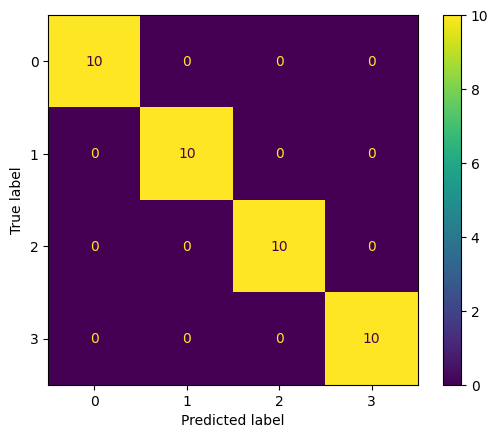

In [46]:
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

# LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression

LR_classifier=LogisticRegression()

LR_classifier.fit(X=X_train,y=y_train)

pred=LR_classifier.predict(X_test)

print("Accuracy = {} % ".format(accuracy_score(y_test,pred)*100))

Accuracy = 100.0 % 


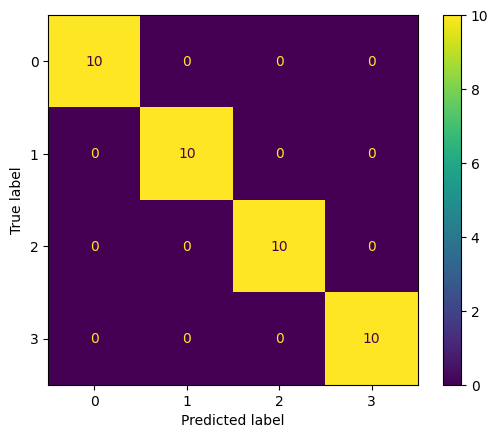

In [48]:
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

# LDA

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [50]:
LDA_classifier=LinearDiscriminantAnalysis()

LDA_classifier.fit(X=X_train,y=y_train)

pred=LDA_classifier.predict(X_test)

print("Accuracy = {} % ".format(accuracy_score(y_test,pred)*100))

Accuracy = 100.0 % 


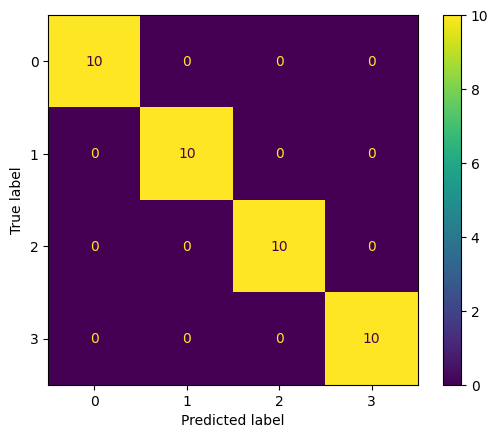

In [51]:
cm=confusion_matrix(y_test,pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()

# saving models

In [52]:
# type_=1:use wavelet
# type_=2:use fiducial_features
# type_=3:use AC/DCT

In [53]:
import pickle

In [54]:
if type_==1:
     pickle.dump(LDA_classifier,open('LDA_classifier_wavelet.pkl','wb'))
# fiducial 
elif type_==2:
    pickle.dump(LDA_classifier,open('LDA_classifier_fiducial.pkl','wb'))
else:
    pickle.dump(LDA_classifier,open('LDA_classifier_ACDCT.pkl','wb'))    

# Loading and Testing

In [93]:
path='sub_1.txt'
to_test = np.loadtxt(path)
type_=2

In [94]:
if type_==1:
    loaded_model=pickle.load(open('LDA_classifier_wavelet.pkl','rb'))
# fiducial 
elif type_==2:
    loaded_model=pickle.load(open('LDA_classifier_fiducial.pkl','rb'))
else:
    loaded_model=pickle.load(open('LDA_classifier_ACDCT.pkl','rb'))

In [95]:
test=preprocessing(to_test,type_)

In [96]:
test=np.array(test)
test.shape

(1, 8)

In [97]:
test

array([[-3.24773726e-01,  7.68115830e-01,  6.00000000e+02,
         0.00000000e+00,  2.25735663e+00,  7.40000000e+01,
        -3.35757689e-01,  8.00000000e+00]])

In [98]:
loaded_model.n_features_in_

8

In [99]:
def prep_type(type_):
    if type_==1:
        return 'wavelet'
    elif type_==2:
        return 'fiducial_features'
    else:
        return 'AC/DCT'
# type_=1:use wavelet
# type_=2:use fiducial_features
# type_=3:use AC/DCT

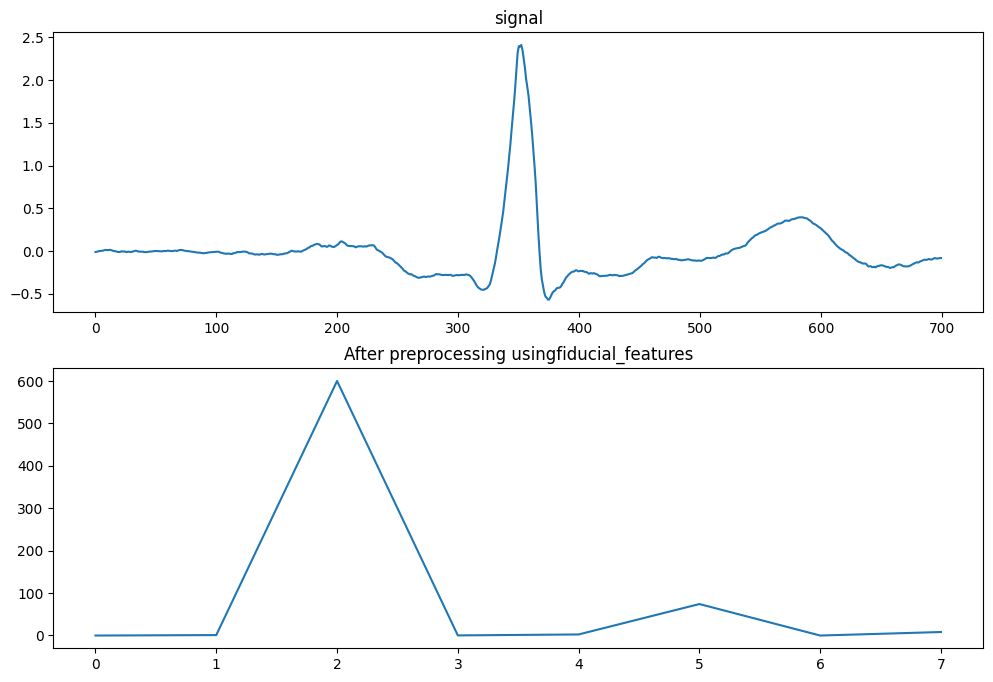

In [100]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.title('signal')
plt.plot(to_test)

plt.subplot(2,1,2)
# plt.title(f'After preprocessing using{prep_type(type_)}')
# plt.plot(test[0])

if type_==2:
    plt.title(f'After preprocessing using{prep_type(type_)}')
    plt.plot(test[0])

else:
    
    plt.title(f'After preprocessing using{prep_type(type_)}')
    plt.plot(test)

In [101]:
if type_ !=2:
    test=np.expand_dims(test,axis=0)
print('test shape after ',test.shape)
test.shape

test shape after  (1, 8)


(1, 8)

In [102]:
pred=loaded_model.predict(test)

pred[0]

0

In [251]:
# using fiducial featues 

# svm 100%
# LR 75%
# LDA 100%

# using wavelet featues 

# svm 100%

# LR 100% 

# LDA  100%

# using AC/DCT featues 

# svm   100%

# LR   100%

# LDA   100%
